# Host-Parasitoid Interactions

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

First, we simulate the vanilla Lotka-Volterra or Nicholson-Bailey host-parasitoid model with the same parameters used on p.47 of de Vries et al.'s book (see the pop. modelling demo).

In [265]:
def sim(r, c, a, H0, P0, T, model='NB'):
    
    H = np.zeros(T+1, dtype=float)
    P = np.zeros(T+1, dtype=float)

    H[0] = H0
    
    P[0] = P0

    for n in range(1,T+1):
        
        if model == 'NB':
        
            f = np.exp(-a*P[n-1])
            
        elif model == 'LV':
            
            f = 1.-a*P[n-1]
        
        H[n] = r * f * H[n-1]
        
        P[n] = c*(1.-f)*H[n-1]
        
    return H,P

In [266]:
r = 1.05
a = 0.005
c = 3. 

# LV equilibrium 
#Heq = 1./(a*c)
#Peq = (r-1.)/(a*r)

# NB equilibrium 
Heq = np.log(r)/(a*c*(1.-1./r))
Peq = np.log(r)/a

# prescribe initial state
H0 = Heq
P0 = 0.9*Peq 

T = 300

In [216]:
H, P = sim(r,c,a,H0,P0,int(T), model='NB')

0.01651013345650859


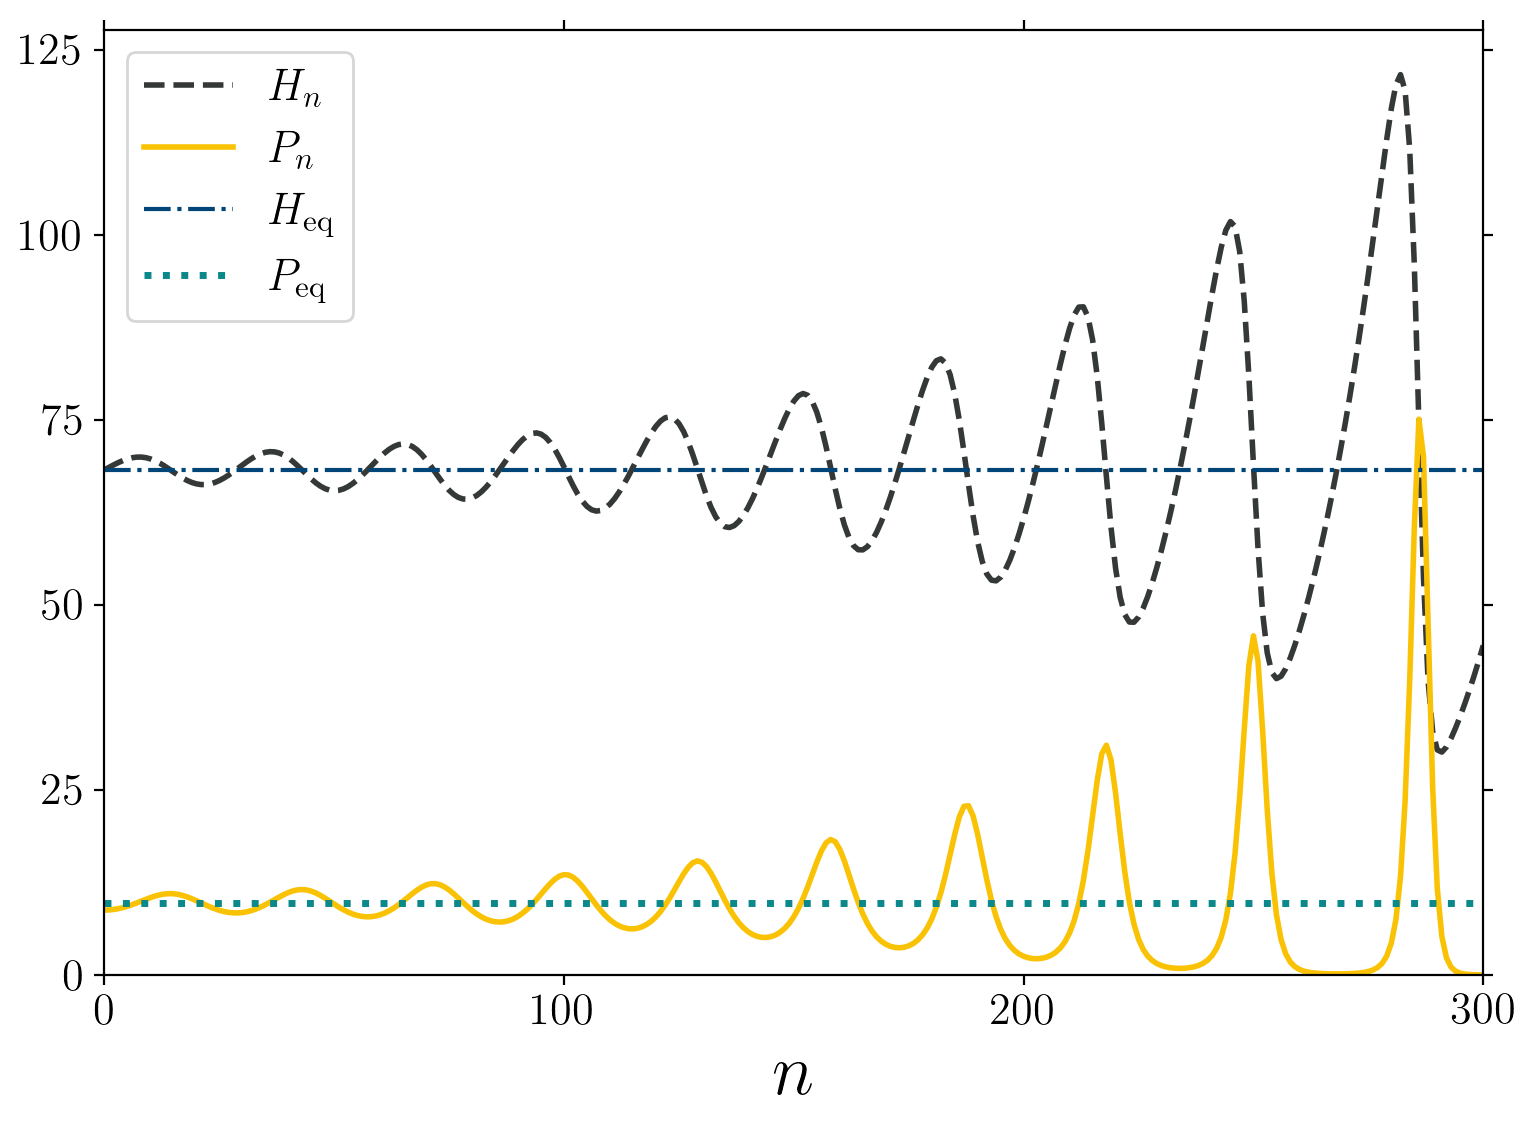

In [267]:
show_eq = True

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax =plt.subplots()   
    
tt = np.arange(0,T+1)
plt.plot(tt, H, color='xkcd:charcoal', linestyle='dashed', label=r'$H_{n}$', linewidth=2)
plt.plot(tt, P, color='xkcd:goldenrod', label=r'$P_{n}$', linewidth=2)

if show_eq: 
    
    plt.plot(tt, Heq*np.ones_like(tt), '-.', color='xkcd:prussian blue', label=r'$H_{\mathrm{eq}}$')
    plt.plot(tt, Peq*np.ones_like(tt), linestyle='dotted', color='xkcd:dark cyan', label=r'$P_{\mathrm{eq}}$', linewidth=2.5)

else: 
    
    pass

plt.xlabel(r"$n$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([0, T])
plt.ylim([-0.01, 1.05*max(np.amax(P), np.amax(H))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'sim_time_series_NB_A.png'
#plt.savefig(figname, dpi=600)

plt.show()

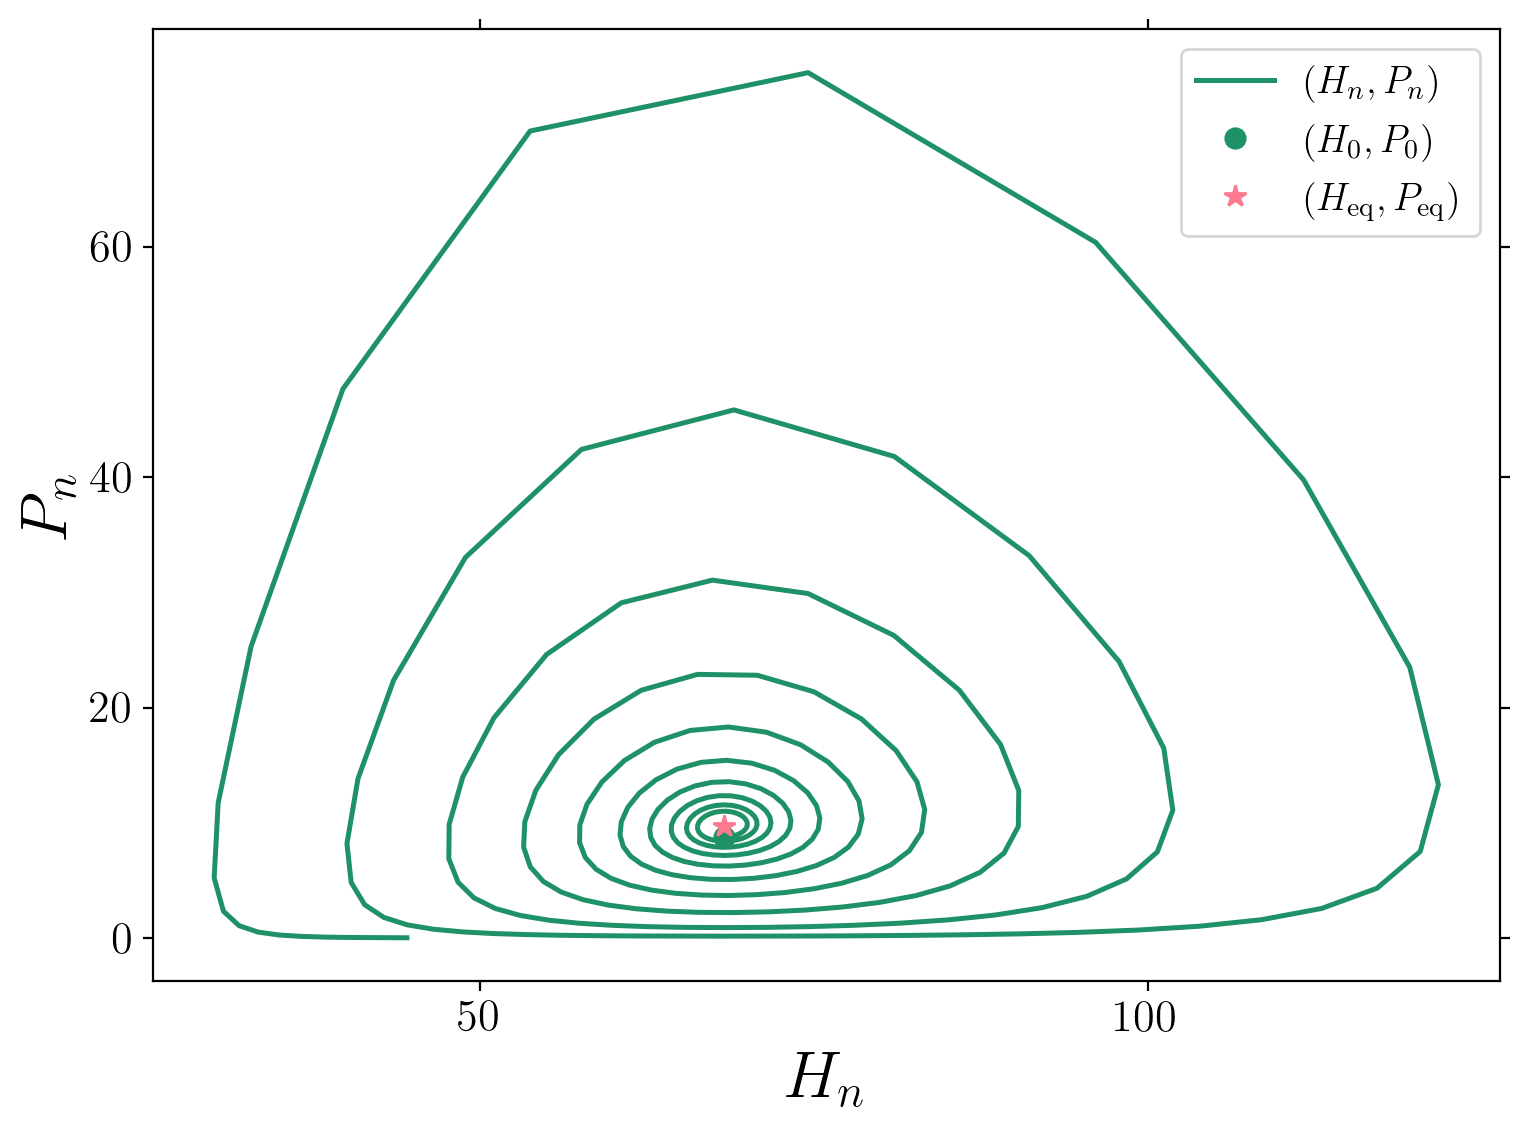

In [268]:
# Phase Portraits
fig, ax =plt.subplots()   

plt.plot(H, P, '-', color='xkcd:viridian', linewidth=1.8, label=r'$\left(H_n, P_n\right)$')
plt.plot(H[0], P[0],'o', color='xkcd:viridian', markersize=7, label=r'$\left(H_0, P_0\right)$')
plt.plot(Heq, Peq,'*', color='xkcd:carnation', markersize=8, label=r'$\left(H_{\mathrm{eq}}, P_{\mathrm{eq}}\right)$')

plt.xlabel(r"$H_{n}$", fontsize=24, color = 'k')
plt.ylabel(r"$P_{n}$", fontsize=24, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=14)

#plt.xlim([0-0.01, 1.05*max(np.amax(P), np.amax(H))])
#plt.ylim([-0.01, 1.05*max(np.amax(P), np.amax(H))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'sim_phase_portrait_NB_A.png'
#plt.savefig(figname, dpi=600)

plt.show()

Now we simulate a modified NB model where the unparasitized hosts reproduce according to Beverton-Holt. This should stabilize the growing oscillations a bit. It's fun to play with the BH parameters here and see what kinds of stabilization occur!

In [269]:
def sim_nb_bh(b,L, c, a, H0, P0, T):
    
    H = np.zeros(T+1, dtype=float)
    P = np.zeros(T+1, dtype=float)

    H[0] = H0
    
    P[0] = P0

    for n in range(1,T+1):
        
        f = np.exp(-a*P[n-1])
        
        H[n] = f * H[n-1]*(b*L)/(L+(b-1)*H[n-1])
        
        P[n] = c*(1.-f)*H[n-1]
        
    return H,P

In [270]:
b = 2.
L = 300

T= 250

For the hybrid model, equilibria must be found numerically. This can be done by solving a system of nonlinear equations via SciPy's $\texttt{fsolve}$ function. 

In [271]:
def my_func(X):
    
    H = X[0]
    
    P = X[1]
    
    f = np.exp(-a*P)
        
    func_1 = -H+f * H*(b*L)/(L+(b-1)*H)
    
    func_2 = -P+c*(1.-f)*H
    
    return np.array([func_1, func_2])

from scipy.optimize import fsolve

Xeq = fsolve(my_func, [Heq, Peq])

Heq_bh = Xeq[0]

Peq_bh = Xeq[1]

In [272]:
H_bh, P_bh = sim_nb_bh(b,L,c,a,Heq_bh,0.9*Peq_bh,int(T))

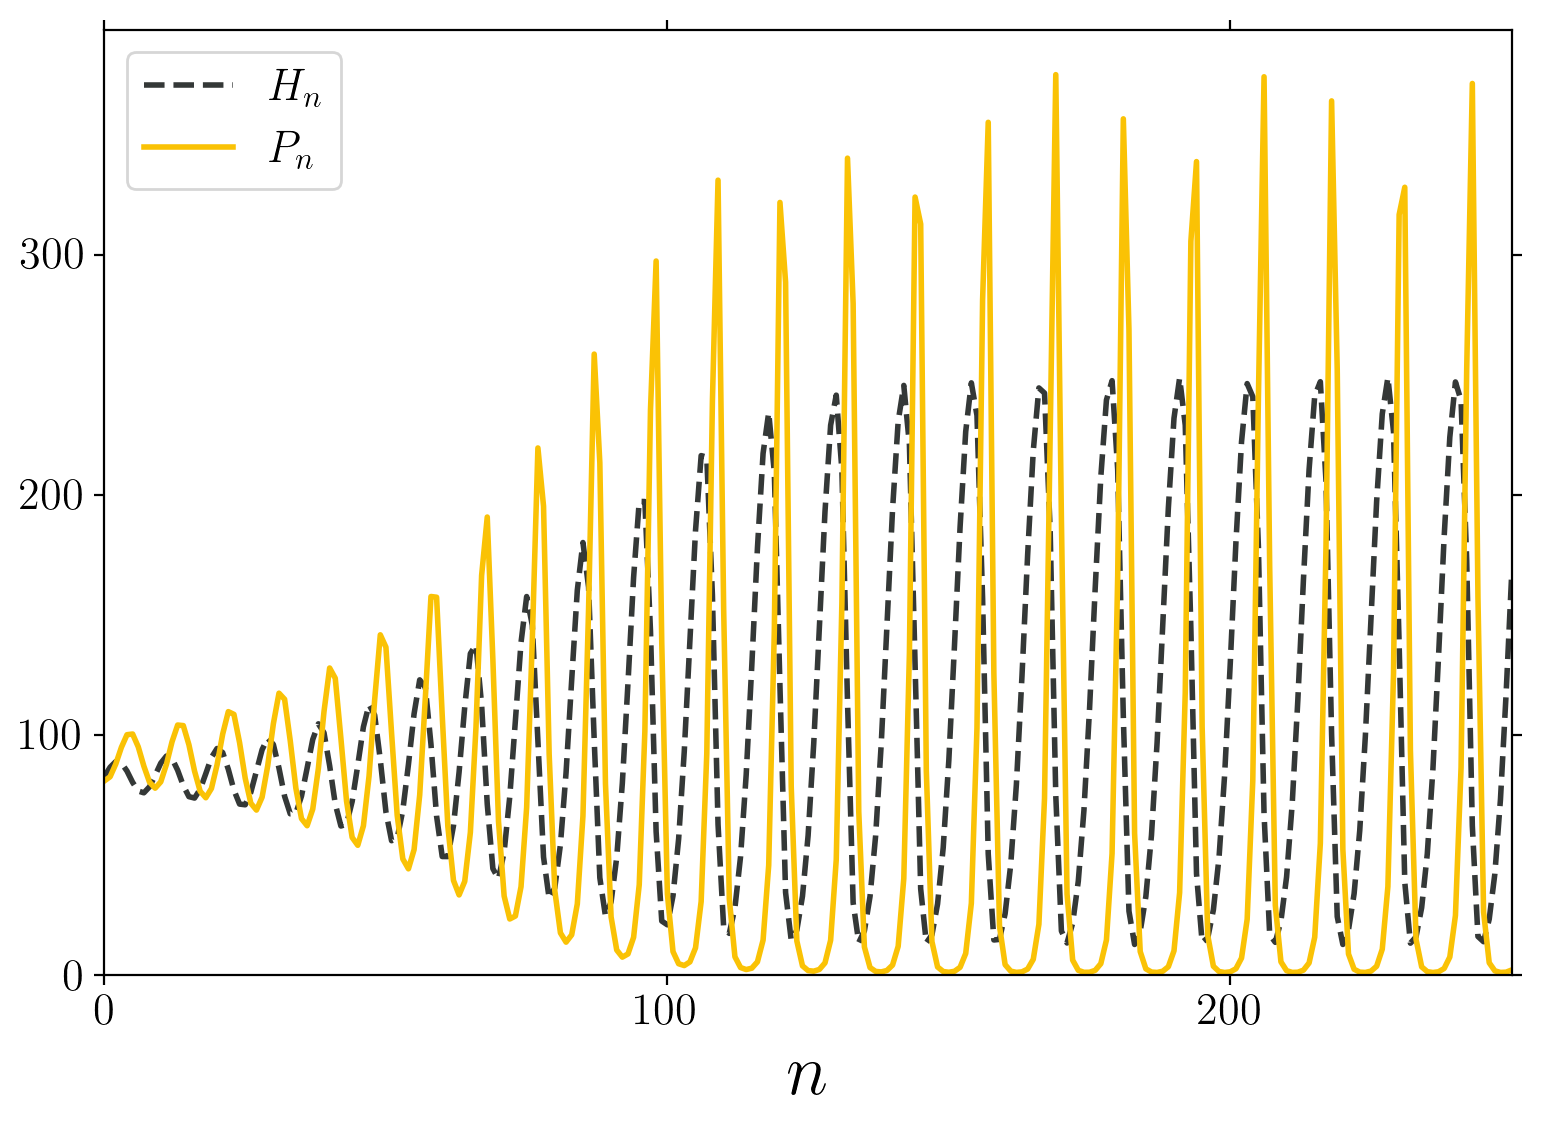

In [273]:
show_eq = False

fig, ax =plt.subplots()   
    
tt = np.arange(0,T+1)
plt.plot(tt, H_bh, color='xkcd:charcoal', linestyle='dashed', label=r'$H_{n}$', linewidth=2)
plt.plot(tt, P_bh, color='xkcd:goldenrod', label=r'$P_{n}$', linewidth=2)

if show_eq: 
    
    plt.plot(tt, Heq_bh*np.ones_like(tt), '-.', color='xkcd:prussian blue', label=r'$H_{\mathrm{eq}}$', linewidth=2.5)
    plt.plot(tt, Peq_bh*np.ones_like(tt), linestyle='dotted', color='xkcd:dark cyan', label=r'$P_{\mathrm{eq}}$', linewidth=2.5)

else: 
    
    pass

plt.xlabel(r"$n$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([0, T])
plt.ylim([-0.01, 1.05*max(np.amax(H_bh),np.amax(P_bh))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'nb_bh_sim_L=%.2f' % (L) + '.png'
#plt.savefig(figname, dpi=600)

plt.show()

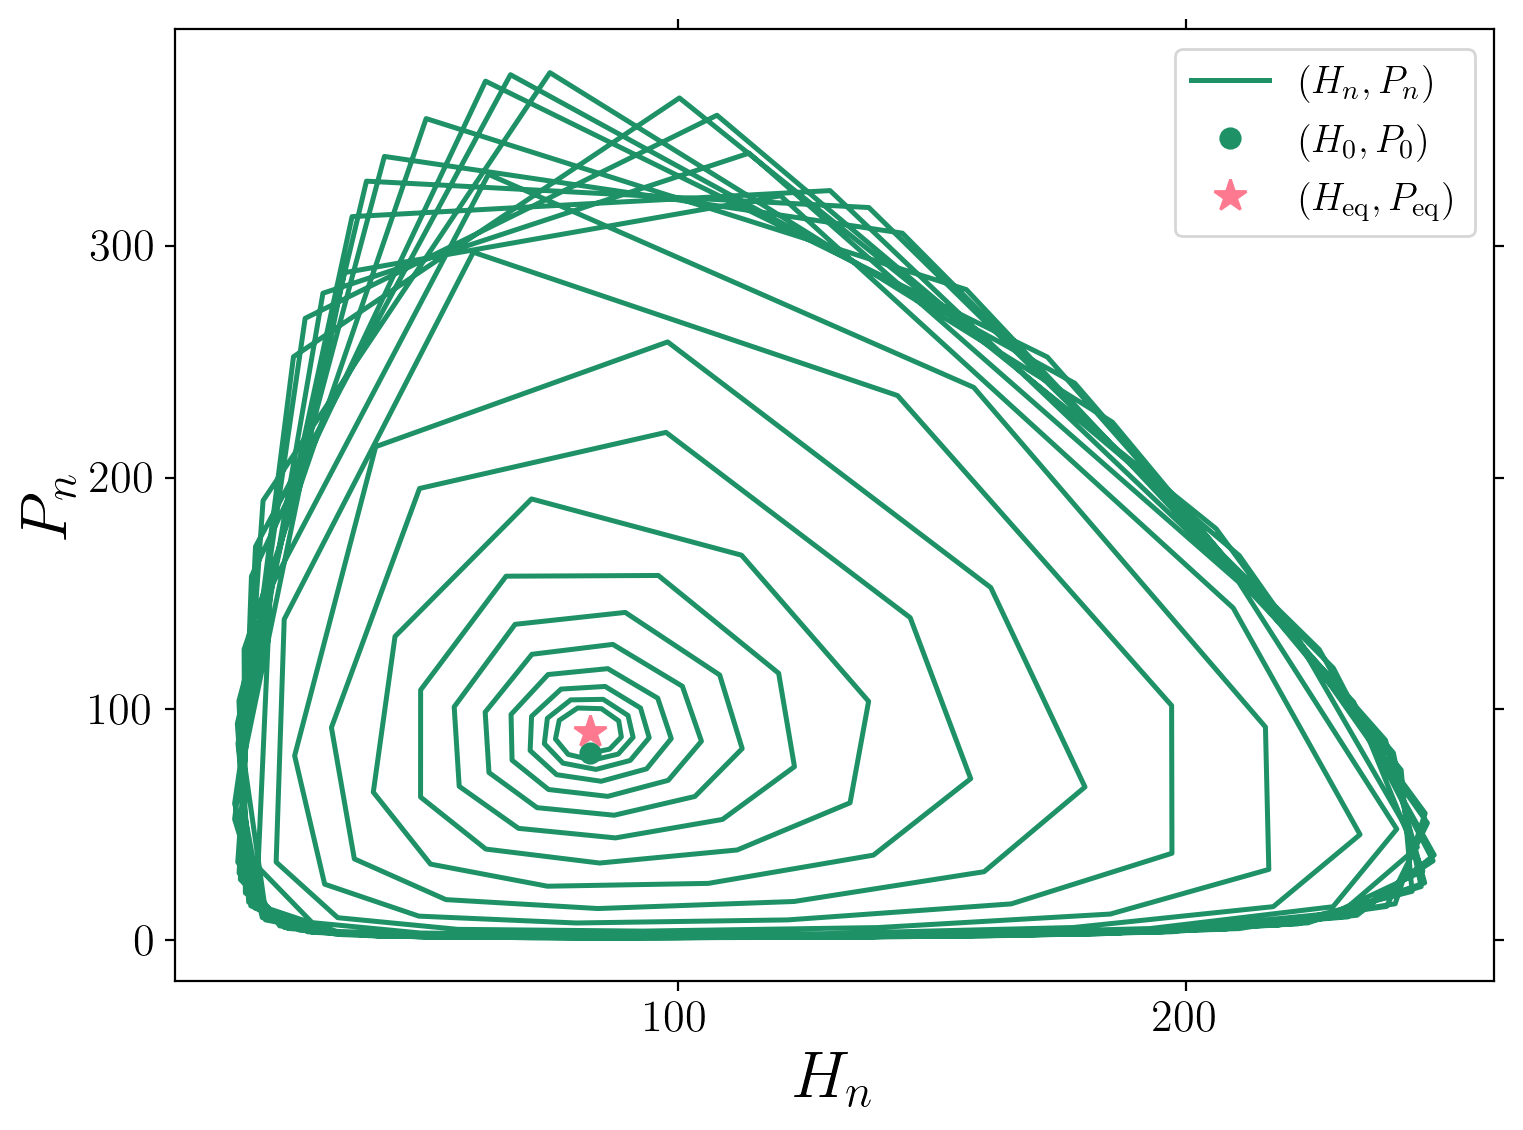

In [274]:
# Phase Portraits
fig, ax = plt.subplots()   

plt.plot(H_bh, P_bh, '-', color='xkcd:viridian', linewidth=1.8, label=r'$\left(H_n, P_n\right)$')
plt.plot(H_bh[0], P_bh[0],'o', color='xkcd:viridian', markersize=7, label=r'$\left(H_0, P_0\right)$')
plt.plot(Heq_bh, Peq_bh,'*', color='xkcd:carnation', markersize=12, label=r'$\left(H_{\mathrm{eq}}, P_{\mathrm{eq}}\right)$')

plt.xlabel(r"$H_{n}$", fontsize=24, color = 'k')
plt.ylabel(r"$P_{n}$", fontsize=24, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=14)

#plt.xlim([0-0.01, 1.05*max(np.amax(P), np.amax(H))])
#plt.ylim([-0.01, 1.05*max(np.amax(P), np.amax(H))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'nb_bh_sim_phase_portrait_L=%.2f' % (L) + '.png'
#plt.savefig(figname, dpi=600)
plt.show()